In [1]:
#import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the dataset
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
#printing part of the dataset
print(dataset.shape)
print(dataset.head)

(5572, 5)
<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN   

In [5]:
#removing unnamed columns i.e data cleansing
dataset = dataset.drop(columns='Unnamed: 2')
dataset = dataset.drop(columns='Unnamed: 3')
dataset = dataset.drop(columns='Unnamed: 4')

In [6]:
#checking the cleansed data
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the columns accordingly
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [8]:
#CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["message"])

In [9]:
# Classifying spam and not spam msgs as 1 and 0
dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
y = dataset['label']

In [13]:

#Splitting the dataset into testing and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
#Creating a Naive Bayes Classifier model
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
#Testing the model
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [16]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[1176   20]
 [   6  191]]


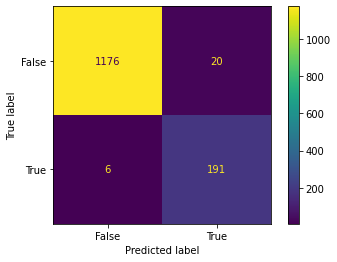

In [17]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [18]:
#Accuracy of Naive Bayes Classifier model
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9813352476669059


In [19]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9764103695906831


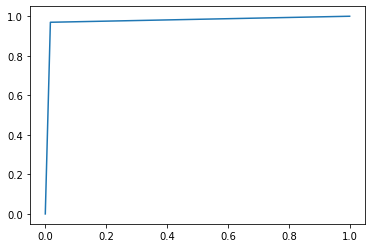

In [20]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [21]:
#Printing the classification report of Naive Bayes classifier model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1196
           1       0.91      0.97      0.94       197

    accuracy                           0.98      1393
   macro avg       0.95      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [22]:
#Creating a SVC model
from sklearn.svm import SVC
#y_test = np.nan_to_num(y_test)
#x_test = np.nan_to_num(x_test)
svc_model = SVC() #initialize the code module
svc_model.fit(X_train,y_train)

SVC()

In [23]:
#Testing the model
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 0 ... 1 0 0]


In [24]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[1196    0]
 [  26  171]]


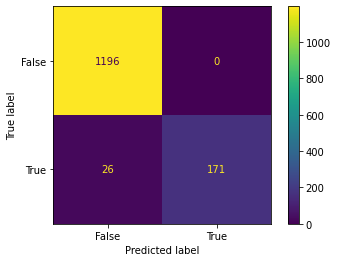

In [25]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [26]:
#Accuracy of SVC
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9813352476669059


In [27]:
#ROC curve for SVC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.934010152284264


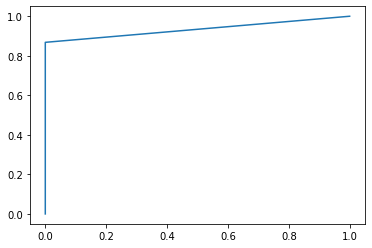

In [28]:
plt.plot(false_positive_rate,true_positive_rate)

In [29]:
#Printing the classification report of SVM classifier model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1196
           1       1.00      0.87      0.93       197

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In this assignment we use spam.csv data set
we use 25 percent of data and rest to model it

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 